In [1]:
# Importing the necessary libraries
from importlib import reload
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras import metrics
import math

import utils
import data

### Load and shuffle images 

In [2]:
### reload(utils)

## Set the seeds to 0 for reproducibility
seed = 0
# number of image to load 
count = 100

np.random.seed(seed)
tf.random.set_seed(seed)

x_train, y_train = utils.load_train_data(count, ignore_sampled=True)
#x_train, y_train = utils.shuffle(x_train, y_train, seed)

label_names = ['MEL', 'NV', 'BCC', 'AK', 'BKL', 'DF', 'VASC', 'SCC', 'UNK']
NUM_OF_CLASSES = len(label_names)

# print(y_train)

y_train = np.delete(y_train, 0, axis=1)
y_train = np.asarray(y_train).astype(np.int32)

print(x_train.shape)
print(x_train[0].shape)
print(type(x_train))
print(type(x_train[0]))
print(len(y_train))
#np.stack(x_train)

(100, 768, 1024, 3)
(768, 1024, 3)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
100


### Plot images 

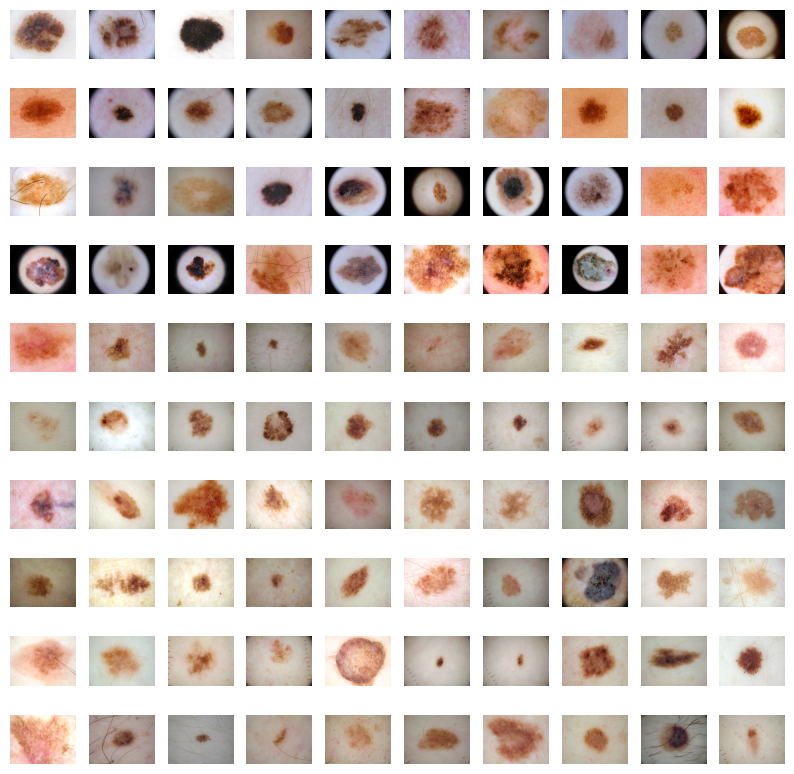

In [3]:
cols = 10
rows = math.ceil(count/cols)
index = 0

fig, axs = plt.subplots(nrows=rows, ncols=cols, figsize=(cols,rows))

for i in range(rows):    
    for j in range(cols):
        if  index >= count: 
            break 
       
        image = x_train[index]
        axs[i][j].imshow(image)
        axs[i][j].set_axis_off()
        index += 1

# remove unused axes
for ax in axs.flat[count:]:
    ax.remove()
    
plt.axis('off')
plt.show()

### Build Model 

In [4]:
def build_model(n_classes, learning_rate=0.01):
    """Build a multi-class logistic regression model using Keras.

      Args:
        n_classes: Number of classes in the dataset
        learning_rate: The desired learning rate for SGD.

      Returns:
        model: A tf.keras model (graph).
    """
    tf.keras.backend.clear_session()
    np.random.seed(0)
    tf.random.set_seed(0)

    model = keras.Sequential()
    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(
        units=n_classes,
        activation='softmax',
        use_bias=True, 
        kernel_initializer=tf.ones_initializer
    ))

    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=[metrics.accuracy])
    
    return model

In [5]:
model = build_model(NUM_OF_CLASSES)

y_pred = model.predict(x_train)

history = model.fit(
  x = x_train,
  y = y_train,
  epochs=100,
  batch_size=10,
  verbose=0)

history = pd.DataFrame(history.history)
display(history)

1/4 [======>.......................] - ETA: 0s

2022-10-16 17:53:57.769045: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


4/4 [==============================] - 0s 23ms/step


,loss,accuracy
0,1.047315e+06,0.822222
1,1.179968e+06,0.937778
2,1.159192e+05,0.940000
3,1.835931e+05,0.951111
4,9.756816e+04,0.957778
...,...,...
95,6.308480e+03,0.991111
96,2.782528e+04,0.988889
97,4.745712e+04,0.982222
98,8.373856e+04,0.973333


### Confusion Matrix 

In [416]:
## TODO revisit this 

from sklearn.metrics import confusion_matrix

y_p=np.argmax(y_pred, axis=1)
y_t=np.argmax(y_train, axis=1)
cm = confusion_matrix(y_t, y_p)
print(cm)

[[ 3  0]
 [14  0]]
